In [1]:
# # Implement a class RigidTransform which should specify a 3Drigid transformation
# # which can warp 3D image volumes.
# import numpy as np
# from scipy.interpolate import interpn
# from scipy.ndimage import map_coordinates
# from scipy.interpolate import griddata

# class RigidTransform:
#     # Initialize class with rotations and translations
#     def __init__(self, rotations, translations, image_size):
#         self.rx = rotations[0]
#         self.ry = rotations[1]
#         self.rz = rotations[2]
#         self.tx = translations[0]
#         self.ty = translations[1]
#         self.tz = translations[2]
#         # self.warped_image_size_x = warped_image_size[0]
#         # self.warped_image_size_y = warped_image_size[1]
#         # self.warped_image_size_z = warped_image_size[2]

#         # Precompute a rotation matrix and a translation vector stored in the class object
#         # Precompute rotation matrices around the X, Y, and Z axis
#         rot_x = np.array([[1, 0, 0],
#                                  [0, np.cos(self.rx), -np.sin(self.rx)],
#                                  [0, np.sin(self.rx), np.cos(self.rx)]])
                                 
#         rot_y = np.array([[np.cos(self.ry), 0, np.sin(self.ry)],
#                                 [0, 1, 0],
#                                 [-np.sin(self.ry), 0, np.cos(self.ry)]])

#         rot_z = np.array([[np.cos(self.rz), -np.sin(self.rz), 0],
#                                 [np.sin(self.rz), np.cos(self.rz), 0],
#                                 [0, 0, 1]])

#         # Compose rotation matrix by multiplying matrices in the correct order
#         # Correct order is Z, Y, X
#         self.rot_vec = np.matmul(rot_z, np.matmul(rot_y, rot_x))

#         # Compose translation vector
#         self.trans_vec = np.array([self.tx, self.ty, self.tz])

#         # Compute displacement vector field
#         self.compute_ddf(image_size)
    
#     # Implement a class function compute_ddf which returns a 3D displacement vector
#     # from warped image to original image at each warped image voxel location
#     def compute_ddf(self, warped_image_size):
#         # Docstring describing the image coordinate system used in this function
#         """
#         The image coordinate system is a Cartesian coordinate system defined as follows:
#         The origin of the coordinate system is at the top left corner of the image.
#         The x-axis points to the right, the y-axis points down, and the z-axis points into the image.
#         The unit used is voxel, with the distance between two adjacent voxels being 1 in all three dimensions (x, y, z).
#         This coordinate system is consistent for both the warped image and the original image,
#         meaning that the coordinates of the voxels in both images are defined in the same way.

#         This code takes a point in the warped image, and computes the corresponding point in the original image.
#         The displacement vector is the difference between the original image point and the warped image point.

#         """



#         # Save warped image sizes in the class object
#         self.warped_image_size_x, self.warped_image_size_y, self.warped_image_size_z = warped_image_size

#         # Pre-allocate displacement vector
#         self.ddf = np.zeros((self.warped_image_size_x, self.warped_image_size_y, self.warped_image_size_z, 3))

#         # Loop through all points in the warped image to
#         # undo the translation by subtracting the translation vector from the point,
#         # then undo the rotation by applying the inverse rotation matrix
#         # the result is the point in the original image
#         for x in range(self.warped_image_size_x):
#             for y in range(self.warped_image_size_y):
#                 for z in range(self.warped_image_size_z):
#                     # Original image point
#                     original_coords = np.matmul(np.linalg.inv(self.rot_vec), np.array([x, y, z]) - self.trans_vec)
#                     # Displacement vector
#                     self.ddf[x, y, z, :] = np.array([x, y, z]) - original_coords
    

#     # Implement a class member function warp which takes an image volume and returns the warped volume
#     def warp(self, volume):
#         """
#         This function takes an image volume and returns the warped volume.
#         To warp the image, the coordinates are rotated and translated, then the value at the new coordinates is interpolated.

#         volume: 3D numpy array of shape (image_size_x, image_size_y, image_size_z)

#         returns: 3D warped volume of shape (warped_image_size_x, warped_image_size_y, warped_image_size_z)

#         """
#         # Pre-allocate warped volume ddf
#         warped_image_coords = []
#         for x in range(volume.shape[0]):
#             for y in range(volume.shape[1]):
#                 for z in range(volume.shape[2]):
#                     # Compute new voxel coordinates in the warped image
#                     # by applying the rotation matrix and then the translation vector
#                     warped_image_coords.append(np.matmul(self.rot_vec, np.array([x, y, z])) + self.trans_vec)
#         warped_image_coords = np.array(warped_image_coords)
#         self.warped_image_coords = warped_image_coords

#         # Interpolate the image volume at the new coordinates to get the warped image volume
#         warped_volume = interpn((np.arange(volume.shape[0]), np.arange(volume.shape[1]), np.arange(volume.shape[2])),
#                                 volume, warped_image_coords, method='nearest',
#                                 bounds_error=False, fill_value=None)

        


#         # Implement interpolation using map_coordinates
#         #warped_volume = map_coordinates(volume, [warped_image_coords.T[0], warped_image_coords.T[1], warped_image_coords.T[2]], order=3, mode='nearest', cval=np.NaN, prefilter=False)
        
#         # Interpolate using griddata
#         # Create a grid of coordinates of the original volume
#         # X, Y, Z = np.meshgrid(np.arange(volume.shape[0]), np.arange(volume.shape[1]), np.arange(volume.shape[2]), indexing='ij')
#         # grid_coords = np.stack((X.ravel(), Y.ravel(), Z.ravel()), axis=1)

#         # # Interpolate the image volume at the new coordinates to get the warped image volume
#         # warped_volume = griddata(grid_coords, volume.ravel(), warped_image_coords, method='nearest')

#         # # Reshape the warped image volume to the correct shape
#         # warped_volume = warped_volume.reshape(volume.shape)

#         # Reshape the warped image volume to the correct shape
#         warped_volume = warped_volume.reshape(volume.shape)




#         return warped_volume

#     # Implement a class member function compose which takes another RigidTransform object and returns a new RigidTransform object
#     # which is the composition of the two transformations
#     def compose(self, rotations2, translations2, image_size):

#         """
#         This function takes a second set of rotations and translations and returns a new RigidTransform object which
#         is the composition of the two transformations.Applying the combined transformation is equivalent to first applying
#         them sequentially, the first transformation followed by the second transformation.

#         rotations2: a 3x3 rotation matrix
#         translations2: a 3x1 translation vector
#         image_size: a 3x1 vector containing the size of the image in each dimension

#         returns: a new RigidTransform object which is the composition of the two transformations


#         """




#         # Create a RigidTransform object from second set of rotations and translations
#         composed_transform = RigidTransform(rotations2, translations2,  warped_image_size = image_size)

#         # Update rotation matrix in the correct order: R2*R1
#         composed_transform.rot_vec = np.matmul(composed_transform.rot_vec, self.rot_vec)

#         # Update translation vector: R2*t1 + t2
#         composed_transform.trans_vec = np.matmul(composed_transform.rot_vec, self.trans_vec) + np.array(translations2)

#         # Update the DDF:
#         composed_transform.compute_ddf(image_size)

        

   



In [23]:
import numpy as np
from RigidTransform import RigidTransform
import random
from matplotlib import pyplot as plt
# Load the image file
volume = np.load('image_train00.npy').T

# Manually define the ranges of the rotations and translations
x_translation_range = np.arange(-0.125*volume.shape[0], 0.125*volume.shape[0], 2)
y_translation_range = np.arange(-0.125*volume.shape[1], 0.125*volume.shape[1], 2)
z_translation_range = np.arange(-0.125*volume.shape[2], 0.125*volume.shape[2], 2)
# Rotation parameters
x_rotation_range = np.arange(-15, 15, 2) # In degrees
y_rotation_range = np.arange(-15, 15, 2) # In degrees
z_rotation_range = np.arange(0, 2, 1) # In degrees


# Rationale for the ranges:
# For the translation, we want to translate the volume by a fraction of the volume size so that the volume is still in the image
# and doesn't introduce large gaps (which are likely to be filled with nans) in the transformed volume that would make it unrecognizable.
# For the rotation, the range was set to a range of -45 to 45 degrees for each dimension which is a reasonable range
# where the volume is still recognizable after rotation.    

# Experiment 1: test the implemented warping and transformation composing
# Experiment 1.1: Randomly sample 3 sets of rigid transformations from the ranges defined above
T1 = (np.deg2rad((random.choice(x_rotation_range), random.choice(y_rotation_range), random.choice(z_rotation_range))), (random.choice(x_translation_range), random.choice(y_translation_range), random.choice(z_translation_range)))
T2 = (np.deg2rad((random.choice(x_rotation_range), random.choice(y_rotation_range), random.choice(z_rotation_range))), (random.choice(x_translation_range), random.choice(y_translation_range), random.choice(z_translation_range)))
T3 = (np.deg2rad((random.choice(x_rotation_range), random.choice(y_rotation_range), random.choice(z_rotation_range))), (random.choice(x_translation_range), random.choice(y_translation_range), random.choice(z_translation_range)))

# Experiment 1.2:Instantiate 3 objects such that they represent three rigid transformations, T1, T1T2, and T1T2T3
# where T1T2 is the composition of T1 and T2, and T1T2T3 is the composition of T1, T2, and T3
rigid_transform_t1 = RigidTransform(rotations = T1[0], translations = T1[1], image_size = volume.shape)
# Composition of T1 and T2 ie applying T1 followed by T2: T1T2 = T2*T1
rigid_transform_t2t1 = rigid_transform_t1.compose(rotations2 = T2[0], translations2 = T2[1], image_size = volume.shape)

# Composition of T1 and T2 and T3 ie applying T1 followed by T2 then T3: T1T2T3 = T3*T1T2 = T3*T2*T1
rigid_transform_t3t2t1 = rigid_transform_t2t1.compose(rotations2 = T3[0], translations2 = T3[1], image_size = volume.shape)

# # Composition of T2 and T3 ie applying T2 followed by T3: T2T3 = T3*T2
# # T2T3: T3*T2
rigid_transform_t2 = RigidTransform(rotations = T2[0], translations = T2[1], image_size = volume.shape)
rigid_transform_t3 = RigidTransform(rotations = T3[0], translations = T3[1], image_size = volume.shape)
# rigid_transform_t3t2 = rigid_transform_t2.compose(rotations2 = T3[0], translations2 = T3[1], image_size = volume.shape)


# Experiment 1.3: Compare the two warped images
# Experiment 1.3.1: Warp the image using the composed transformation T1T2T3
warped_volume_t3t2t1 = rigid_transform_t3t2t1.warp(volume)

# Experiment 1.3.2: Warp the image using the individual transformations sequentially
warped_volume_1 = rigid_transform_t1.warp(volume)

warped_volume_2 = rigid_transform_t2.warp(warped_volume_1)

warped_volume_3 = rigid_transform_t3.warp(warped_volume_2)

# Experiment 1.3.3: Compare the two warped images
print('The difference between the two warped images is: ', np.sum(np.abs(warped_volume_t3t2t1 - warped_volume_3)))



The difference between the two warped images is:  46718631


In [37]:
# save 5 axial slices of sequentially transformed image as png images
# The axial slices should be saved in the following order: 15, 20, 22, 26, 31
for slice in [1, 10, 15, 20, 29]:
#[15, 20, 22, 26, 31]:
    save_axial_slices(warped_volume = warped_volume_3, slice_number_origin = slice,
    filename = "exp3_sequential_warped", title= " a sequentially warped image")

In [38]:
# save 5 axial slices of composed transformed image as png images
# The axial slices should be saved in the following order: 15, 20, 22, 26, 31
for slice in [1, 10, 15, 20, 29]:
#[15, 20, 22, 26, 31]:
    save_axial_slices(warped_volume = warped_volume_t3t2t1, slice_number_origin = slice,
    filename = "exp3_composed_warped", title= " a composed-transformation warped image")

In [31]:
# Create function to save axial slices of the resized images
def save_axial_slices(warped_volume, slice_number_origin, filename, title):
    """
    This is a helper function to save axial slices of the resized images

    Parameters

    ----------
    warped_volume : numpy array
        A volume that has been transformed by composition of rigid transformations or sequentially applied rigid transformations
    slice_number_origin : int
        The slice number in the original image to be saved
    filename : str
        The filename of the saved image
    title : str
        The title of the saved image

    Returns

    -------
    None

    """


    fig, (ax) = plt.subplots(1, figsize=(6, 6))
    ax.imshow(warped_volume[:, :, slice_number_origin], cmap = "bone")
    ax.set_title(f"Axial slice of {title}")
    ax.set_xlabel("x (voxels)")
    ax.set_ylabel("y (voxels)")
    plt.savefig(f"{filename}_slice_{slice_number_origin}.png")
    plt.close(fig)

In [28]:
# Print the above comment
print("Comparing the slices from the composed transformation and the sequential transformation, one can observe that some slices are similar while others are more warped. This is because with sequential transformation, the image is warped multiple times and the warping is not as smooth as with the composed transformation. Each transformation may introduce some error or loss of information and hence with multiple transformations, the cumulative error is more pronounced. A composed transformation minimizes the error by doing all the transformations as a single step.")

Comparing the slices from the composed transformation and the sequential transformation, one can observe that some slices are similar while others are more warped. This is because with sequential transformation, the image is warped multiple times and the warping is not as smooth as with the composed transformation. Each transformation may introduce some error or loss of information and hence with multiple transformations, the cumulative error is more pronounced. A composed transformation minimizes the error by doing all the transformations as a single step.


In [22]:
-0.125*volume.shape[2]

-4.0

In [2]:
import numpy as np
from RigidTransform import RigidTransform
import random
from matplotlib import pyplot as plt

## Load the image file
volume = np.load('image_train00.npy').T

## ----- Manually define the ranges of the rotations and translations ------##
x_translation_range = np.arange(-16, 16, 2)
y_translation_range = np.arange(-16, 16, 2)
z_translation_range = np.arange(-4, 4, 2)
# Rotation parameters
x_rotation_range = np.arange(-15, 15, 2) # In degrees
y_rotation_range = np.arange(-15, 15, 2) # In degrees
z_rotation_range = np.arange(0, 2, 1) # In degrees


# Rationale for the ranges:
# The translation range range was set to a range of 1/8th of the image size in each dimension.
# For the translation, we want to translate the volume by a fraction of the volume size so that the volume is still in the image
# and doesn't introduce large gaps (which are likely to be filled with nans) in the transformed volume, which would make it unrecognizable. 
# For the rotation, the range was set to a range of -15 to 15 degrees for each dimension which is a reasonable range
# where the volume is still recognizable after rotation.    

# Experiment 1: test the implemented warping and transformation composing
# Experiment 1.1: Randomly sample 3 sets of rigid transformations from the ranges defined above
T1 = ((random.choice(x_rotation_range), random.choice(y_rotation_range), random.choice(z_rotation_range)), (random.choice(x_translation_range), random.choice(y_translation_range), random.choice(z_translation_range)))
T2 = ((random.choice(x_rotation_range), random.choice(y_rotation_range), random.choice(z_rotation_range)), (random.choice(x_translation_range), random.choice(y_translation_range), random.choice(z_translation_range)))
T3 = ((random.choice(x_rotation_range), random.choice(y_rotation_range), random.choice(z_rotation_range)), (random.choice(x_translation_range), random.choice(y_translation_range), random.choice(z_translation_range)))


# Experiment 1.2:Instantiate 3 objects such that they represent three rigid transformations, T1, T1T2, and T1T2T3
# where T1T2 is the composition of T1 and T2, and T1T2T3 is the composition of T1, T2, and T3

# Initialize RigidTransform objects for T1, T2, and T3
rigid_transform_t1 = RigidTransform(rotations = np.deg2rad(T1[0]), translations = T1[1], image_size = volume.shape, flag_composing_ddf = False)
rigid_transform_t2 = RigidTransform(rotations = np.deg2rad(T2[0]), translations = T2[1], image_size = volume.shape, flag_composing_ddf = False)
rigid_transform_t3 = RigidTransform(rotations = np.deg2rad(T3[0]), translations = T3[1], image_size = volume.shape, flag_composing_ddf = False)

# Composition of T1 and T2 ie applying T1 followed by T2: T1T2 = T2*T1
rigid_transform_t2t1 = rigid_transform_t1.compose(rotations2 = np.deg2rad(T2[0]), translations2 = T2[1], image_size = volume.shape)

# # Composition of T1 and T2 and T3 ie applying T1 followed by T2 then T3: T1T2T3 = T3*T1T2 = T3*T2*T1
rigid_transform_t3t2t1 = rigid_transform_t2t1.compose(rotations2 = np.deg2rad(T3[0]), translations2 = T3[1], image_size = volume.shape)



# Experiment 1.3: Compare the two warped images
# Experiment 1.3.1: Warp the image using the composed transformation T1T2T3
warped_volume_t3t2t1 = rigid_transform_t3t2t1.warp(volume)

# Experiment 1.3.2: Warp the image using the individual transformations sequentially
warped_volume_1 = rigid_transform_t1.warp(volume)

warped_volume_2 = rigid_transform_t2.warp(warped_volume_1)

warped_volume_3 = rigid_transform_t3.warp(warped_volume_2)

# Experiment 1.3.3: Compare the two warped images
print('The difference between the two warped images is: ', np.mean(np.abs(warped_volume_t3t2t1 - warped_volume_3)))

# Save slices from the two images
# For each warped image, save 5 slices from each image
# Create function to save axial slices of the resized images
def save_axial_slices(warped_volume, slice_number_origin, filename, title):
    """
    This is a helper function to save axial slices of the resized images

    Parameters

    ----------
    warped_volume : numpy array
        A volume that has been transformed by composition of rigid transformations or sequentially applied rigid transformations
    slice_number_origin : int
        The slice number in the original image to be saved
    filename : str
        The filename of the saved image
    title : str
        The title of the saved image

    Returns

    -------
    None

    """


    fig, (ax) = plt.subplots(1, figsize=(6, 6))
    ax.imshow(warped_volume[:, :, slice_number_origin], cmap = "bone")
    ax.set_title(f"Axial slice of {title}")
    ax.set_xlabel("x (voxels)")
    ax.set_ylabel("y (voxels)")
    plt.savefig(f"{filename}_slice_{slice_number_origin}.png")
    plt.close(fig)

# Save the slices
# save 5 axial slices of composed transformed image as png images
for slice in [1, 10, 15, 20, 29]:
#[15, 20, 22, 26, 31]:
    save_axial_slices(warped_volume = warped_volume_t3t2t1, slice_number_origin = slice,
    filename = "exp3_composed_warped", title= " a composed-transformation warped image")

# save 5 axial slices of sequentially transformed image as png images
for slice in [1, 10, 15, 20, 29]:
#[15, 20, 22, 26, 31]:
    save_axial_slices(warped_volume = warped_volume_3, slice_number_origin = slice,
    filename = "exp3_sequential_warped", title= " a sequentially warped image")

# Comparing the slices from the composed transformation and the sequential transformation, one can observe that some 
# slices are similar while others are more warped. This differences can be attributed to accumulation of errors, the transformations applied, and interpolation. 
# Sequential transformations result in the accumulation of rounding errors and floating point inaccuracies, leading to differences in the final output.
# Also, sequential transformations suffer more from the interpolation artifacts as transformations increase since some 
# transformations such as rotation can lead to cropping. 
# A composed transformation minimizes the error by doing all the transformations as a single step.


# Print the above comment
print('Comparing the slices from the composed transformation and the sequential transformation, one can observe that some slices are similar while others are more warped \n')
print('This differences can be attributed to accumulation of errors, the transformations applied, and interpolation. \n')
print('Sequential transformations result in the accumulation of rounding errors and floating point inaccuracies, leading to differences in the final output. \n')
print('Also, sequential transformations suffer more from the interpolation artifacts as transformations increase since some transformations such as rotation can lead to cropping. \n')
print('A composed transformation minimizes the error by doing all the transformations as a single step. \n')


# Experiment 2: Repeat Experiment 1 after enabling flag_composing_ddf = True
# Experiment 2.2:Instantiate 3 objects such that they represent three rigid transformations, T1, T1T2, and T1T2T3
# where T1T2 is the composition of T1 and T2, and T1T2T3 is the composition of T1, T2, and T3

# Initialize RigidTransform objects for T1, T2, and T3
rigid_transform_t1 = RigidTransform(rotations = np.deg2rad(T1[0]), translations = T1[1], image_size = volume.shape, flag_composing_ddf = True)
rigid_transform_t2 = RigidTransform(rotations = np.deg2rad(T2[0]), translations = T2[1], image_size = volume.shape, flag_composing_ddf = True)
rigid_transform_t3 = RigidTransform(rotations = np.deg2rad(T3[0]), translations = T3[1], image_size = volume.shape, flag_composing_ddf = True)



# Composition of T1 and T2 ie applying T1 followed by T2: T1T2 = T2*T1
rigid_transform_t2t1 = rigid_transform_t1.compose(rotations2 = np.deg2rad(T2[0]), translations2 = T2[1], image_size = volume.shape)


# # Composition of T1 and T2 and T3 ie applying T1 followed by T2 then T3: T1T2T3 = T3*T1T2 = T3*T2*T1
rigid_transform_t3t2t1 = rigid_transform_t2t1.compose(rotations2 = np.deg2rad(T3[0]), translations2 = T3[1], image_size = volume.shape)

# Experiment 2.3: Compare the two warped images
# Experiment 2.3.1: Warp the image using the composed transformation T1T2T3
warped_volume_t3t2t1_flag = rigid_transform_t3t2t1.warp(volume)

# Experiment 1.3.2: Warp the image using the individual transformations sequentially
warped_volume_1 = rigid_transform_t1.warp(volume)

warped_volume_2 = rigid_transform_t2.warp(warped_volume_1)

warped_volume_3_flag = rigid_transform_t3.warp(warped_volume_2)

# Compute the voxel-level difference between the two warped images from the two algorithms
composed_voxel_level_difference = np.abs(warped_volume_t3t2t1_flag - warped_volume_t3t2t1)
sequential_voxel_level_difference = np.abs(warped_volume_3_flag - warped_volume_3)
# Report the mean and standard deviation of the voxel-level difference
print('The mean and standard deviation of the voxel-level difference between the two warped images from the two algorithms are: \n')
print(f'Mean voxel level difference from composed transformation algorithm : {np.mean(composed_voxel_level_difference)} and \n Standard deviation of voxel level differences from composed transformation algorithm {np.std(composed_voxel_level_difference)} \n')
print(f'Mean voxel level difference from sequential transformation algorithm: {np.mean(sequential_voxel_level_difference)} and \n Standard deviation of voxel level differences from sequential transformation algorithm {np.std(sequential_voxel_level_difference)} \n')


# Save the slices
# save 5 axial slices of composed transformed image as png images
for slice in [1, 10, 15, 20, 29]:
#[15, 20, 22, 26, 31]:
    save_axial_slices(warped_volume = warped_volume_t3t2t1_flag, slice_number_origin = slice,
    filename = "exp3-2_flag_composed_warped", title= " a composed-transformation warped image")

# save 5 axial slices of sequentially transformed image as png images
for slice in [1, 10, 15, 20, 29]:
#[15, 20, 22, 26, 31]:
    save_axial_slices(warped_volume = warped_volume_3_flag, slice_number_origin = slice,
    filename = "exp3-2_flag_sequential_warped", title= " a sequentially warped image")


## Comment on the visual comparison to those obtained in Experiment 1
# From the visual comparison, the slices from the sequential transformation algorithm are similar to those obtained in Experiment 1.
# This makes sense since the sequential transformation algorithm is the same as the one used in Experiment 1.
# The slices from the composed transformation algorithm are subtly different from those obtained in Experiment 1.
# This observation can be supported by the small differences in the mean and standard deviation of the voxel-level difference between the two warped images from the two algorithms.
# This difference can be attributed to the accumulation of errors, during the calculation of the two separate ddfs.

# Print the above comment
print('From the visual comparison, the slices from the sequential transformation algorithm are similar to those obtained in Experiment 1. \n')
print('This makes sense since the sequential transformation algorithm is the same as the one used in Experiment 1. \n')
print('The slices from the composed transformation algorithm are subtly different from those obtained in Experiment 1. \n')
print('This observation can be supported by the small differences in the mean and standard deviation of the voxel-level difference between the two warped images from the two algorithms. \n')
print('This difference can be attributed to the accumulation of errors, during the calculation of the two separate ddfs. \n')
print("But overall, the two algorithms produce similar results as expected. \n")

The difference between the two warped images is:  71298163
Comparing the slices from the composed transformation and the sequential transformation, one can observe that some slices are similar while others are more warped 

This differences can be attributed to accumulation of errors, the transformations applied, and interpolation. 

Sequential transformations result in the accumulation of rounding errors and floating point inaccuracies, leading to differences in the final output. 

Also, sequential transformations suffer more from the interpolation artifacts as transformations increase since some transformations such as rotation can lead to cropping. 

A composed transformation minimizes the error by doing all the transformations as a single step. 



In [19]:
np.mean(np.abs(warped_volume_t3t2t1 - warped_volume_3))

135.99045372009277

In [16]:
voxel_level_difference

array([[[   0,    0,    0, ...,   34,   22,   -4],
        [   0,    0,    0, ...,   34,   22,   -4],
        [   0,    0,    0, ...,   34,   22,   -4],
        ...,
        [ -31,   85,   33, ...,  -41,  -41,  -41],
        [   7,   63,   15, ...,  -80,  -80,  -80],
        [  85,   53,   57, ...,  -82,  -82,  -82]],

       [[   0,    0,    0, ...,   34,   22,   -4],
        [   0,    0,    0, ...,   34,   22,   -4],
        [   0,    0,    0, ...,   34,   22,   -4],
        ...,
        [ -31,   85,   33, ...,  -41,  -41,  -41],
        [   7,   63,   15, ...,  -80,  -80,  -80],
        [  85,   53,   57, ...,  -82,  -82,  -82]],

       [[   0,    0,    0, ...,   34,   22,   -4],
        [   0,    0,    0, ...,   34,   22,   -4],
        [   0,    0,    0, ...,   34,   22,   -4],
        ...,
        [ -31,   85,   33, ...,  -41,  -41,  -41],
        [   7,   63,   15, ...,  -80,  -80,  -80],
        [  85,   53,   57, ...,  -82,  -82,  -82]],

       ...,

       [[  29,   29,   2

In [15]:
voxel_level_difference.mean()

1.6499824523925781

In [10]:
1+1

2

In [6]:
rigid_transform_t2t1.ddf

array([[[[ 10.42729172,   3.98862526,  -4.42836952],
         [ 10.53170866,   4.02396994,  -4.40953371],
         [ 10.63612559,   4.05931463,  -4.39069791],
         ...,
         [ 13.45538289,   5.01362112,  -3.8821312 ],
         [ 13.55979983,   5.04896581,  -3.86329539],
         [ 13.66421677,   5.08431049,  -3.84445959]],

        [[ 10.39251965,   3.99996481,  -4.46489433],
         [ 10.49693659,   4.03530949,  -4.44605853],
         [ 10.60135353,   4.07065418,  -4.42722273],
         ...,
         [ 13.42061082,   5.02496068,  -3.91865602],
         [ 13.52502776,   5.06030536,  -3.89982021],
         [ 13.6294447 ,   5.09565005,  -3.88098441]],

        [[ 10.35774759,   4.01130436,  -4.50141915],
         [ 10.46216452,   4.04664905,  -4.48258335],
         [ 10.56658146,   4.08199373,  -4.46374754],
         ...,
         [ 13.38583876,   5.03630023,  -3.95518083],
         [ 13.49025569,   5.07164491,  -3.93634503],
         [ 13.59467263,   5.1069896 ,  -3.91750922]],

In [7]:
rigid_transform_t1.ddf + rigid_transform_t2.ddf

array([[[[ 10.42729172,   3.98862526,  -4.42836952],
         [ 10.53170866,   4.02396994,  -4.40953371],
         [ 10.63612559,   4.05931463,  -4.39069791],
         ...,
         [ 13.45538289,   5.01362112,  -3.8821312 ],
         [ 13.55979983,   5.04896581,  -3.86329539],
         [ 13.66421677,   5.08431049,  -3.84445959]],

        [[ 10.39251965,   3.99996481,  -4.46489433],
         [ 10.49693659,   4.03530949,  -4.44605853],
         [ 10.60135353,   4.07065418,  -4.42722273],
         ...,
         [ 13.42061082,   5.02496068,  -3.91865602],
         [ 13.52502776,   5.06030536,  -3.89982021],
         [ 13.6294447 ,   5.09565005,  -3.88098441]],

        [[ 10.35774759,   4.01130436,  -4.50141915],
         [ 10.46216452,   4.04664905,  -4.48258335],
         [ 10.56658146,   4.08199373,  -4.46374754],
         ...,
         [ 13.38583876,   5.03630023,  -3.95518083],
         [ 13.49025569,   5.07164491,  -3.93634503],
         [ 13.59467263,   5.1069896 ,  -3.91750922]],

In [15]:
# Experiment 1.3: Compare the two warped images
# Experiment 1.3.1: Warp the image using the composed transformation T1T2T3
warped_volume_t3t2t1 = rigid_transform_t3t2t1.warp(volume)

# Experiment 1.3.2: Warp the image using the individual transformations sequentially
warped_volume_1 = rigid_transform_t1.warp(volume)

warped_volume_2 = rigid_transform_t2.warp(warped_volume_1)

warped_volume_3 = rigid_transform_t3.warp(warped_volume_2)


In [23]:
rigid_transform_t1.ddf.reshape(rigid_transform_t1.warped_image_coords.shape).shape

(524288, 3)

In [22]:
rigid_transform_t1.warped_image_coords.shape

(524288, 3)

In [16]:
# Experiment 1.3.3: Compare the two warped images
print('The difference between the two warped images is: ', np.sum(np.abs(warped_volume_t3t2t1 - warped_volume_3)))

The difference between the two warped images is:  98567822


The difference between sequential image transformations and a single composed transformation can be due to accumulation of errors, the specific transformations applied, and the interpolation method used. Sequential transformations can result in the accumulation of rounding errors and floating point inaccuracies, leading to differences in the final output. Some image transformations, such as rotations and scaling, can result in loss of information or introduce interpolation artifacts. Slicing the image can also lead to differences in appearance based on the specific transformation applied. The choice of using sequential transformations or a single composed transformation will depend on the specific requirements and goals of the image processing task.

In [27]:
# # Import griddata
# from scipy.interpolate import griddata
# RRR2 = np.matmul(rigid_transform_t2.rot_vec, rigid_transform_t1.rot_vec)
# TTT2 = np.matmul(rigid_transform_t2.rot_vec, rigid_transform_t1.trans_vec) + rigid_transform_t2.trans_vec
# warped_image_coords = []
# for x in range(volume.shape[0]):
#     for y in range(volume.shape[1]):
#         for z in range(volume.shape[2]):
#             # Compute new voxel coordinates in the warped image
#             # by applying the rotation matrix and then the translation vector
#             warped_image_coords.append(np.matmul(RRR2, np.array([x, y, z])) + TTT2)
# warped_image_coords = np.array(warped_image_coords)
# warped_image_coords = warped_image_coords
# X, Y, Z = np.meshgrid(np.arange(volume.shape[0]), np.arange(volume.shape[1]), np.arange(volume.shape[2]), indexing='ij')
# grid_coords = np.stack((X.ravel(), Y.ravel(), Z.ravel()), axis=1)

# # Interpolate the image volume at the new coordinates to get the warped image volume
# # volume is flattened to a 1D array of shape (n,)
# # warped image coordinates are already in the correct shape (n, Dim)
# warped_volume = griddata(grid_coords, volume.ravel(), warped_image_coords, method='nearest')

# # Reshape the warped image volume to the correct shape
# warped_volume = warped_volume.reshape(volume.shape)

In [33]:
RRR2

array([[ 0.99971663, -0.01588567, -0.01772858],
       [ 0.01651245,  0.99922305,  0.03578603],
       [ 0.01714632, -0.03606864,  0.99920221]])

In [37]:
rigid_transform_t2t1.rot_vec

array([[ 9.99238569e-01, -3.48968390e-02,  1.74497484e-02],
       [ 3.48968390e-02,  9.99390873e-01,  3.04586490e-04],
       [-1.74497484e-02,  3.04586490e-04,  9.99847695e-01]])

In [34]:
TTT2

array([9.99999666, 6.99908617, 2.10481006])

In [35]:
rigid_transform_t2t1.trans_vec

array([1.15407565, 4.04891373, 3.23664607])

In [60]:
T2

((-37, 15, 0), (5, 3, 1))

In [8]:
rigid_transform_t2 = RigidTransform(rotations = np.deg2rad(T2[0]), translations = T2[1], image_size = volume.shape)
rigid_transform_t3 = RigidTransform(rotations = np.deg2rad(T3[0]), translations = T3[1], image_size = volume.shape)

In [9]:
warped_volume_x = rigid_transform_t3t2t1.warp(volume)
#warped_volume_x2 = rigid_transform_t2t1.warp(volume)

In [10]:
# Experiment 1.3: Compare the two warped images
# Experiment 1.3.1: Warp the image using the composed transformation
warped_volume_1 = rigid_transform_t1.warp(volume)

warped_volume_2 = rigid_transform_t2.warp(warped_volume_1)

warped_volume_3 = rigid_transform_t3.warp(warped_volume_2)


In [17]:
print('The difference between the two warped images is: ', np.sum((warped_volume_x + warped_volume_3)))

The difference between the two warped images is:  194990106


In [9]:
warped_volume_1 = rigid_transform_t1.warp(volume)
T1

((-1, 3, 1), (3, 6, 0))

In [10]:
T2

((-1, -4, 0), (7, 1, 2))

In [11]:
T3

((-2, 3, 0), (8, 4, 4))

In [88]:
128/8

16.0

In [1]:
# Load image train 00
import numpy as np
from RigidTransform import RigidTransform
import random
from matplotlib import pyplot as plt

volume = np.load('image_train00.npy').T
orig_coords = np.stack(np.mgrid[:volume.shape[0], :volume.shape[1], :volume.shape[2]], axis = -1)
# Define translation and rotation parameters
rotations = np.deg2rad(np.array([45,0,0]))
translations = np.array([8,0 , 0])

rotations2 = np.deg2rad([3, 3, 3])
translations2 = np.array([0, 0, 0])
rigid_transform = RigidTransform(rotations = rotations, translations = translations, image_size = (128, 128, 32), flag_composing_ddf = False)



In [2]:
warped_volume = rigid_transform.warp(volume)
warped_volume.shape

(128, 128, 32)

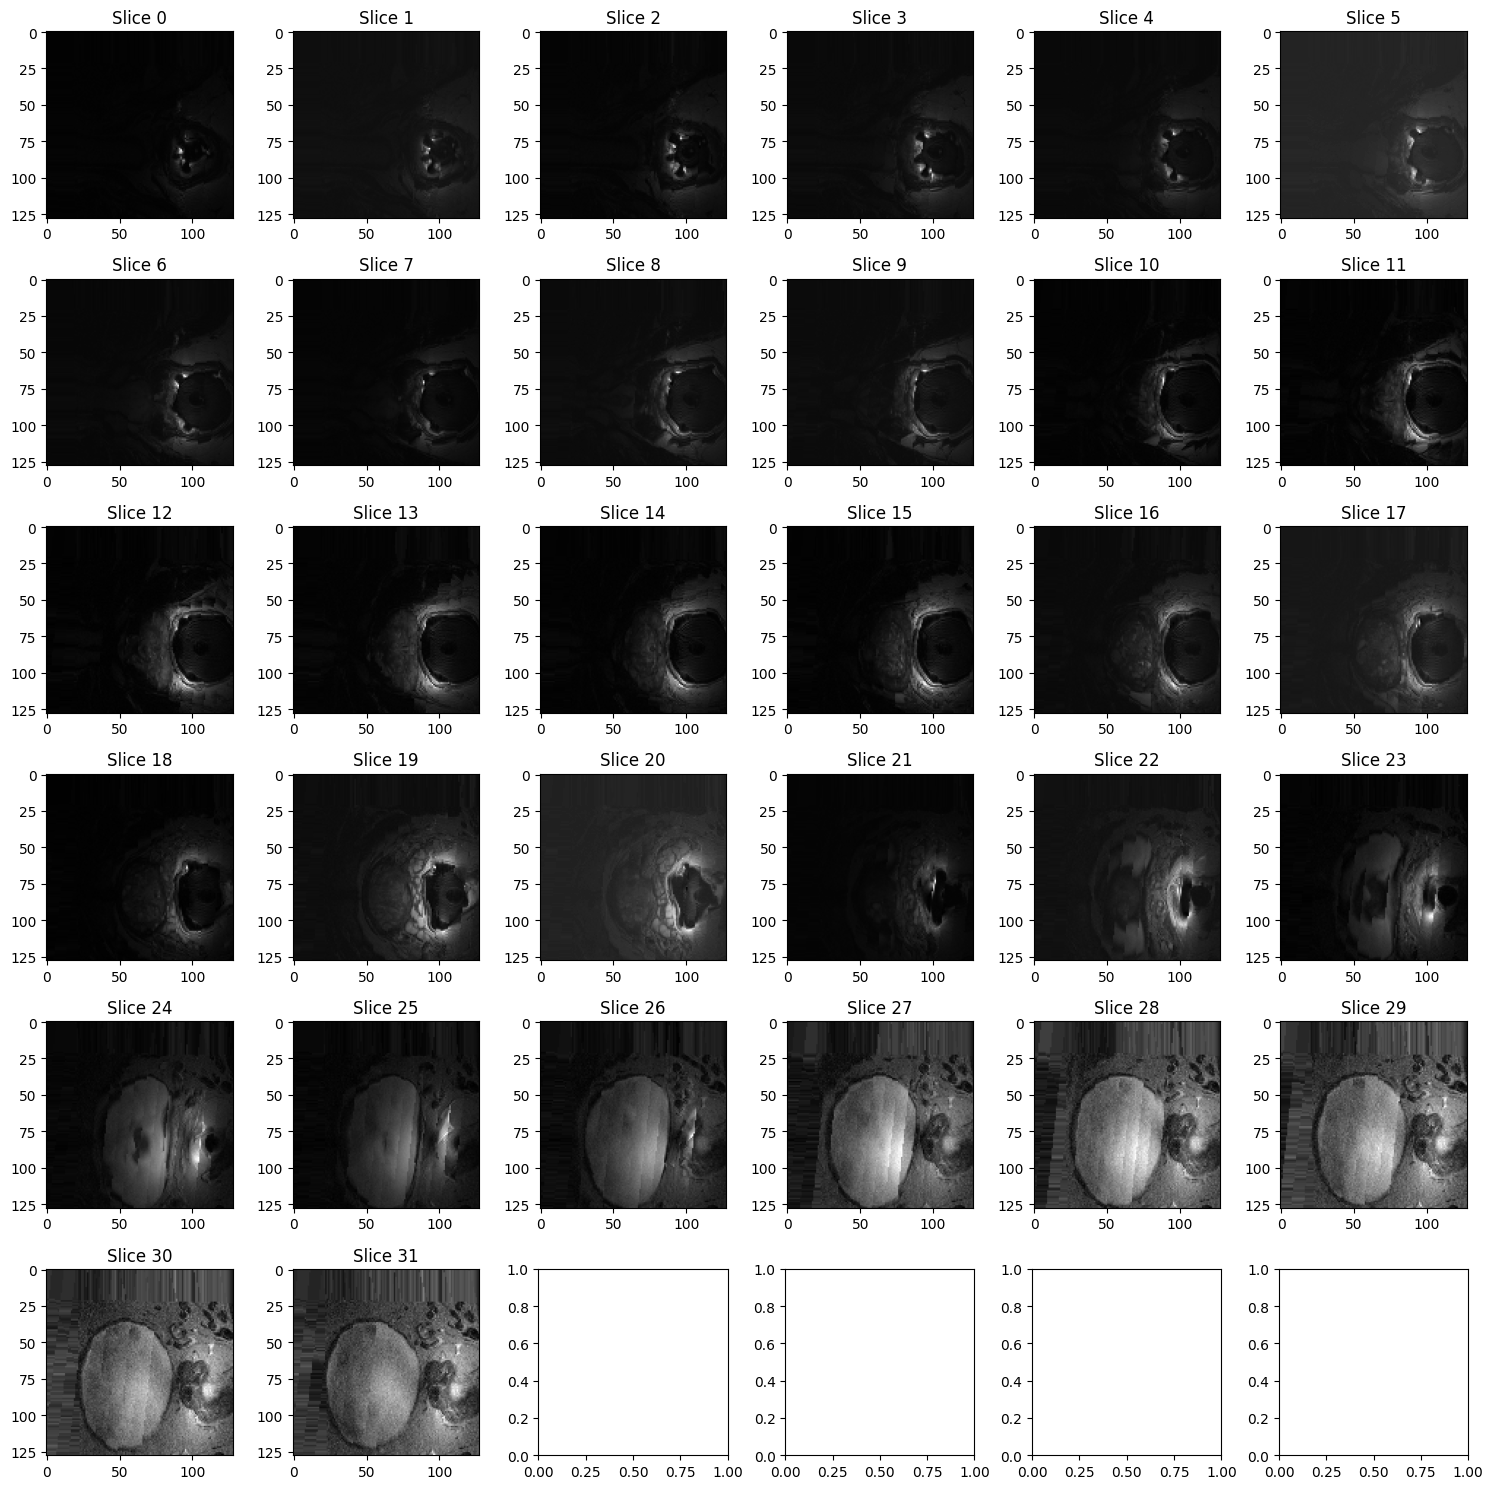

In [7]:
from matplotlib import pyplot as plt
warped_volume = warped_volume_t3t2t1_flag
# Visualize slices
n_rows = 6
n_cols = 6

# Create a figure with a subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate over the slices of the image
for row in range(n_rows):
    for col in range(n_cols):
        slice_idx = row * n_cols + col
        if slice_idx >= warped_volume.shape[2]:
            break
        slice_data = warped_volume[:, :, slice_idx]
        axs[row, col].imshow(slice_data, cmap='gray')
        # Add title to each subplot
        axs[row, col].set_title(f'Slice {slice_idx}')

# Adjust the layout and show the figure
plt.tight_layout()
plt.show()

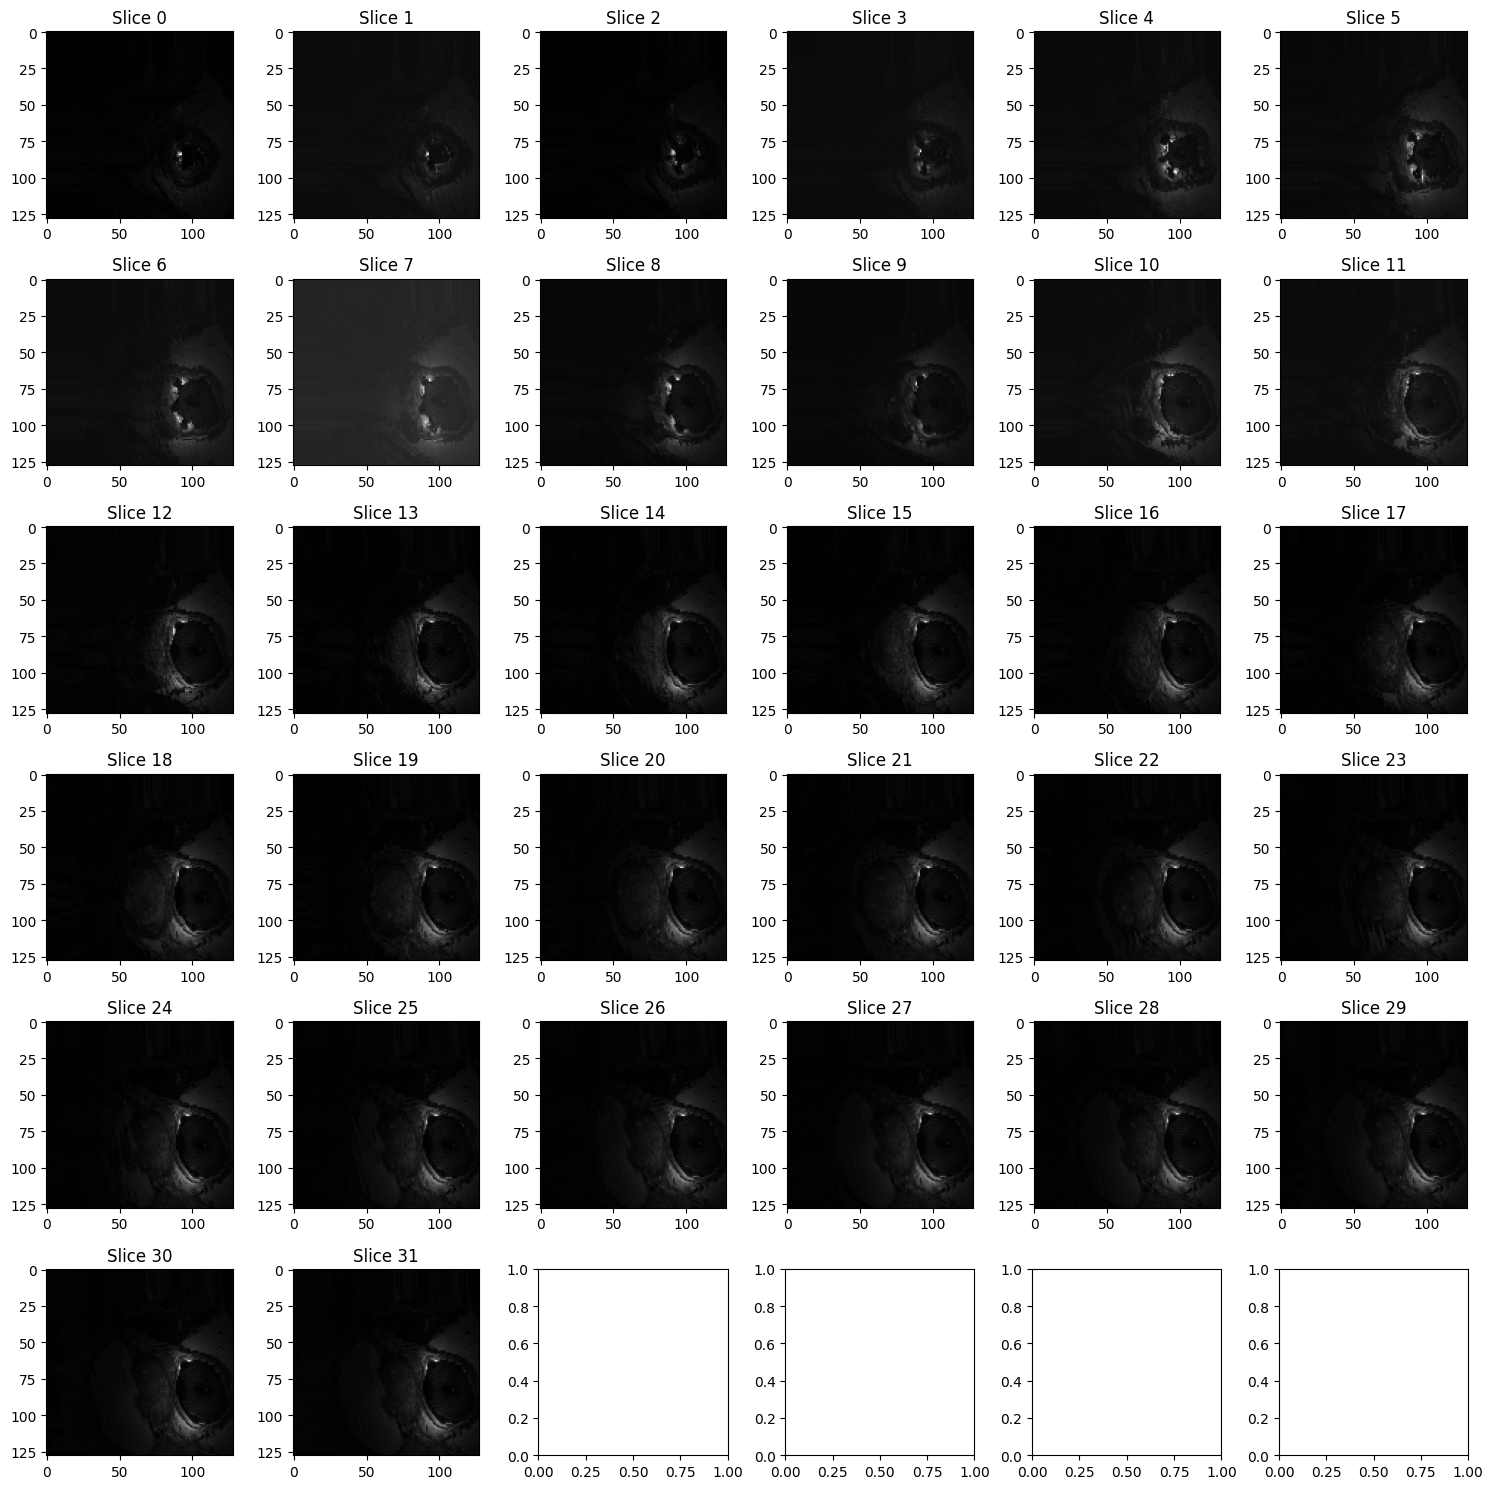

In [8]:
from matplotlib import pyplot as plt
warped_volume = warped_volume_3_flag
# Visualize slices
n_rows = 6
n_cols = 6

# Create a figure with a subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate over the slices of the image
for row in range(n_rows):
    for col in range(n_cols):
        slice_idx = row * n_cols + col
        if slice_idx >= warped_volume.shape[2]:
            break
        slice_data = warped_volume[:, :, slice_idx]
        axs[row, col].imshow(slice_data, cmap='gray')
        # Add title to each subplot
        axs[row, col].set_title(f'Slice {slice_idx}')

# Adjust the layout and show the figure
plt.tight_layout()
plt.show()

In [16]:
rigid_transform_t1.warped_image_coords

array([[  0.        ,  28.        , -16.        ],
       [ -0.9289717 ,  28.03181926, -16.36878058],
       [ -1.8579434 ,  28.06363852, -16.73756116],
       ...,
       [ -1.09515527, 199.36343053, -77.0931691 ],
       [ -2.02412697, 199.39524979, -77.46194968],
       [ -2.95309867, 199.42706905, -77.83073026]])

Text(0.5, 1.0, 'Warped')

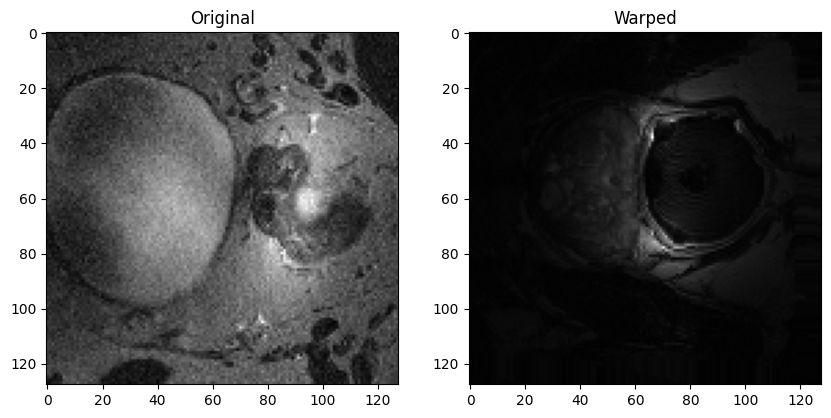

In [21]:
warped_image_coords = rigid_transform_t2.warped_image_coords
warped_image_coords.shape
from scipy.interpolate import griddata
X, Y, Z = np.meshgrid(np.arange(volume.shape[0]), np.arange(volume.shape[1]), np.arange(volume.shape[2]), indexing='ij')
grid_coords = np.stack((X.ravel(), Y.ravel(), Z.ravel()), axis=1)
grid_coords.shape

volume.ravel().shape
warped_volume = griddata(grid_coords, warped_volume_1.ravel(), warped_image_coords, method='nearest')
warped_volume.shape
# Reshape the warped image volume to the correct shape
warped_volume = warped_volume.reshape(volume.shape)

import matplotlib.pyplot as plt
# Visualize example slices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(volume[:,:,31], cmap='gray')
ax1.set_title('Original')
ax2.imshow(warped_volume[:,:,13], cmap='gray')
ax2.set_title('Warped')

Text(0.5, 1.0, 'Warped')

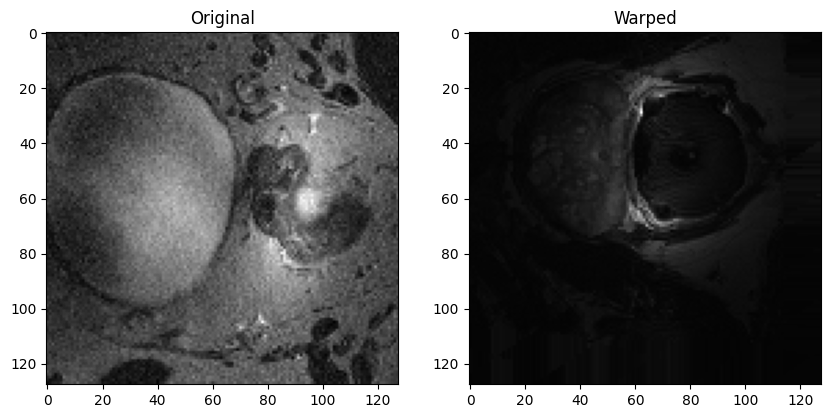

In [22]:
warped_image_coords = rigid_transform_t3.warped_image_coords
warped_image_coords.shape
from scipy.interpolate import griddata
X, Y, Z = np.meshgrid(np.arange(volume.shape[0]), np.arange(volume.shape[1]), np.arange(volume.shape[2]), indexing='ij')
grid_coords = np.stack((X.ravel(), Y.ravel(), Z.ravel()), axis=1)
grid_coords.shape

volume.ravel().shape
warped_volume = griddata(grid_coords, warped_volume_2.ravel(), warped_image_coords, method='nearest')
warped_volume.shape
# Reshape the warped image volume to the correct shape
warped_volume = warped_volume.reshape(volume.shape)

import matplotlib.pyplot as plt
# Visualize example slices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(volume[:,:,31], cmap='gray')
ax1.set_title('Original')
ax2.imshow(warped_volume[:,:,13], cmap='gray')
ax2.set_title('Warped')

Text(0.5, 1.0, 'Warped')

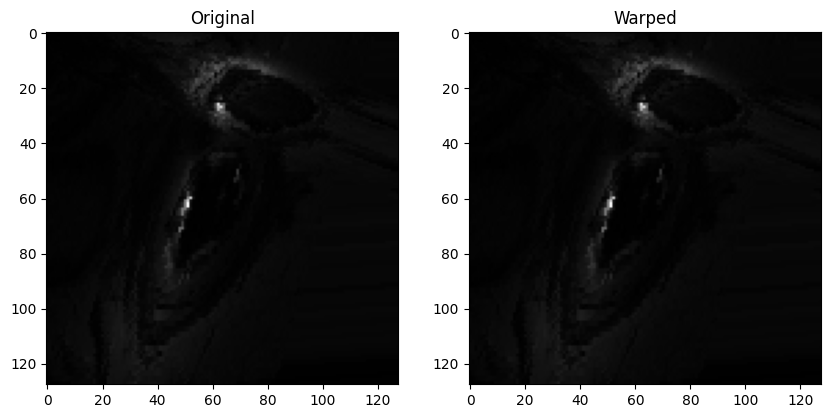

In [67]:
import matplotlib.pyplot as plt
# Visualize example slices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(warped_volume[:,:,31], cmap='gray')
ax1.set_title('Original')
ax2.imshow(warped_volume_x[:,:,31], cmap='gray')
ax2.set_title('Warped')

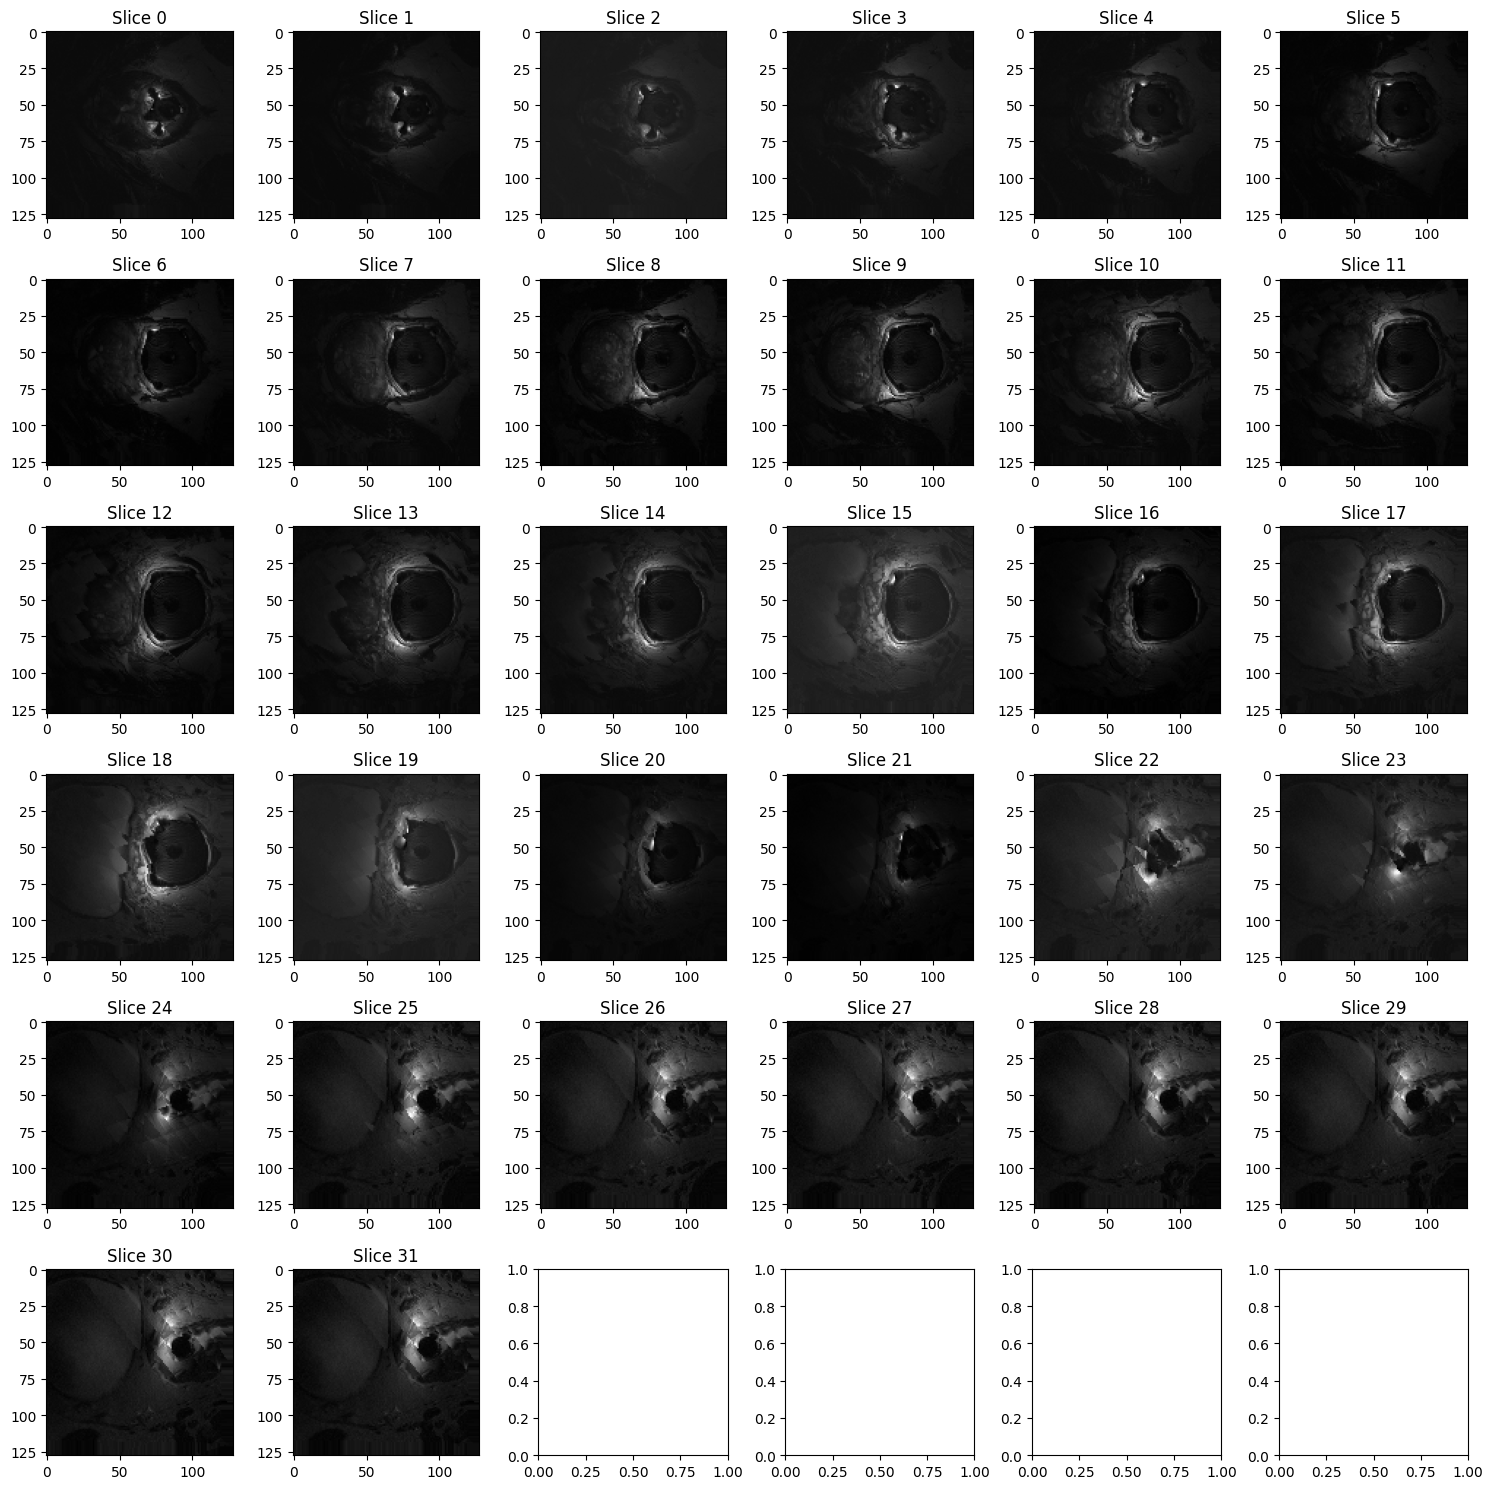

In [10]:
import matplotlib.pyplot as plt
warped_volume = warped_volume_3
# Visualize slices
n_rows = 6
n_cols = 6

# Create a figure with a subplot grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate over the slices of the image
for row in range(n_rows):
    for col in range(n_cols):
        slice_idx = row * n_cols + col
        if slice_idx >= warped_volume.shape[2]:
            break
        slice_data = warped_volume[:, :, slice_idx]
        axs[row, col].imshow(slice_data, cmap='gray')
        # Add title to each subplot
        axs[row, col].set_title(f'Slice {slice_idx}')

# Adjust the layout and show the figure
plt.tight_layout()
plt.show()